# 0.0. Imports

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection
import math

## 0.1 Helper Functions

## 0.1 Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0 Descriação dos Dados

## 1.1 Renomear Colunas

In [3]:
df1 = df_raw.copy()

In [4]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 
        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

## 1.2. Dimensão dos Dados

In [5]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Columns: 18


## 1.3 Tipos dos dados

In [6]:
# Alterar o tipo de dados para data
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Valores Nulos/Faltantes

In [7]:
df1.isna().sum()[df1.isna().sum()>0].sort_values(ascending=False)

promo_interval                  508031
promo2_since_year               508031
promo2_since_week               508031
competition_open_since_year     323348
competition_open_since_month    323348
competition_distance              2642
dtype: int64

In [8]:
na = df1.isna().sum()[df1.isna().sum()>0].sort_values(ascending=False).index.tolist()
na

['promo_interval',
 'promo2_since_year',
 'promo2_since_week',
 'competition_open_since_year',
 'competition_open_since_month',
 'competition_distance']

## 1.5 Imputação dos dados faltantes

In [9]:
# Levantar hipóteses sobre as razões dos NAs


# 'competition_open_since_year',
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# 'competition_open_since_month',

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# 'competition_distance' --> Muito distante a ponto de não ser encarada como competição 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x:200000 if math.isnan(x)else x)

# 'promo2_since_year',
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# 'promo2_since_week',
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# 'promo_interval',

month_map = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df1.fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

## 1.6 Alterando os tipos de dados

In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [24]:
# De float para int
df1.competition_open_since_month = df1.competition_open_since_month.astype(int)
df1.competition_open_since_year = df1.competition_open_since_year.astype(int)
df1.promo2_since_week = df1.promo2_since_week.astype(int)
df1.promo2_since_year = df1.promo2_since_year.astype(int)

## 1.7 Estatística Descritiva

Tipos de métricas: 
* Tendência central: resumo dos dados em um único escalar 
    * Média e Mediana

* Dispensão: concentração ou dispersão em torno das medidas de tendência central 
    * Desvio Padrão
    * Skew: desformação/assimetria em relação à normal
    * Kurtosis: concentração dos dados em relação a determinado ponto
    * Mínimo, máximo e quartis

In [25]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [27]:
num = df1.select_dtypes(include=['int64','int32','float'])
cat = df1.select_dtypes(include=['object'])

### 1.7.1 Variáveis numéricas

In [13]:
#Tendência Central - média e mediana
ct1 = pd.DataFrame(num.apply(np.mean)).T
ct2 = pd.DataFrame(num.apply(np.median)).T

# Dispersão - min, max, range, skew, curtosis
d1 = pd.DataFrame(num.apply(np.std)).T
d2 = pd.DataFrame(num.apply(min)).T
d3 = pd.DataFrame(num.apply(max)).T
d4 = pd.DataFrame(num.apply(lambda x:x.max()-x.min())).T
d5 = pd.DataFrame(num.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num.apply(lambda x: x.kurtosis())).T

# Concatenar os dataframes
m = pd.concat([d2,d3,d4,ct1,ct2,d1, d5,d6]).T.reset_index()
columns = ['attributes','min','max','range', 'mean','median', 'std','skew','kurtosis']
m.head()

,index,0,0,0,0,0,0,0,0
0,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
1,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
2,competition_open_since_year,1.0,2015.0,2014.0,1372.032482,2006.0,932.640284,-0.782151,-1.388100
3,promo2_since_week,1.0,52.0,51.0,23.619033,22.0,14.310057,0.178723,-1.184046
4,promo2_since_year,2009.0,2015.0,6.0,2012.793297,2013.0,1.662657,-0.784436,-0.210075


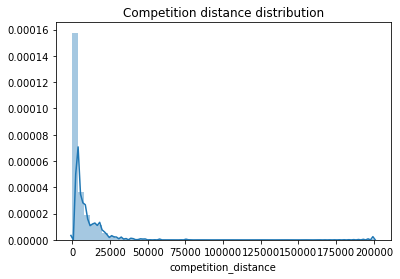

In [14]:
# Exemplo: há uma concentração muito grande de competidores nas proximidades das lojas
sns.distplot(df1['competition_distance']).set_title('Competition distance distribution');

### 1.7.2 Variáveis categóricas

In [29]:
cat.apply(lambda x:x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

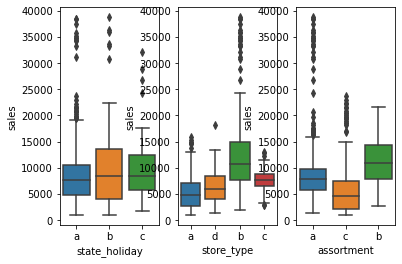

In [32]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales']>0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux);

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux);

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux);